## JRN longterm climate trends

USHCN Stations at Jornada:

JORNADA EXPERIMENTAL RANGE: USH00294426  


In [1]:
import sys
sys.path.append('/home/greg/GitHub/')
import climate_tools.get_ushcn as ushcn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

basep = '/home/greg/data/rawdata/NCDC/ushcn_v2.5/'

In [2]:
inventory = ushcn.get_stationsfile()
inventory.head()

,id,lat,lon,elev,state,name,comp1,comp2,comp3,utcoffset
0,USH00011084,31.0581,-87.0547,25.9,AL,BREWTON 3 SSE,------,------,------,6
1,USH00012813,30.5467,-87.8808,7.0,AL,FAIRHOPE 2 NE,------,------,------,6
2,USH00013160,32.8347,-88.1342,38.1,AL,GAINESVILLE LOCK,011694,------,------,6
3,USH00013511,32.7017,-87.5808,67.1,AL,GREENSBORO,------,------,------,6
4,USH00013816,31.8700,-86.2542,132.0,AL,HIGHLAND HOME,------,------,------,6


In [3]:
search = inventory[inventory['name'].str.contains(
    'JORNADA')]
print(search)
studystn = search.id.values.tolist()
studystnnames = search.name.values.tolist()
studystnlat = search.lat.values.tolist()

              id      lat       lon    elev state               name   comp1  \
661  USH00294426  32.6169 -106.7411  1300.3    NM  JORNADA EXP RANGE  ------   

      comp2   comp3  utcoffset  
661  ------  ------          7  


In [12]:
# See functions, this will fetch precip and avg T, subset to site
# drop flags, and convert to correct units
tavg = ushcn.get_monthly_var('tavg', dataset='latest', stationids=studystn)
prcp = ushcn.get_monthly_var('prcp', dataset='latest', stationids=studystn)

tavg = tavg.loc[tavg.year < 2022,:]
prcp = prcp.loc[prcp.year < 2022,:]

Opening /home/greg/data/rawdata/NCDC/ushcn_v2.5/ushcn.v2.5.5.20220609/USH00294426.FLs.52j.tavg
Opening /home/greg/data/rawdata/NCDC/ushcn_v2.5/ushcn.v2.5.5.20220609/USH00294426.FLs.52j.prcp


In [13]:
tavg['station_name'] = ''
tavg['latitude'] = np.nan
prcp['station_name'] = ''
prcp['latitude'] = np.nan
for i in range(0, 1):
    print(str(i) + ' ' + studystn[i] + ' ' + studystnnames[i] + ' ' + str(studystnlat[i]))
    tavg.loc[tavg.stationid==studystn[i], 'station_name'] = studystnnames[i]
    tavg.loc[tavg.stationid==studystn[i], 'latitude'] = studystnlat[i]
    prcp.loc[prcp.stationid==studystn[i], 'station_name'] = studystnnames[i]
    prcp.loc[prcp.stationid==studystn[i], 'latitude'] = studystnlat[i]
    
out = pd.concat([tavg, prcp])

0 USH00294426 JORNADA EXP RANGE 32.6169


In [23]:
out.to_csv('../data/Jornada_USHCN_monthlyclimate.csv', index=False)
out.tail()

,stationid,date,year,month,day,variable,value,station_name,latitude
1046,USH00294426,2021-08-31,2021,aug,31,prcp,29.0,JORNADA EXP RANGE,32.6169
1177,USH00294426,2021-09-30,2021,sep,30,prcp,26.2,JORNADA EXP RANGE,32.6169
1308,USH00294426,2021-10-31,2021,oct,31,prcp,2.0,JORNADA EXP RANGE,32.6169
1439,USH00294426,2021-11-30,2021,nov,30,prcp,10.2,JORNADA EXP RANGE,32.6169
1570,USH00294426,2021-12-31,2021,dec,31,prcp,0.0,JORNADA EXP RANGE,32.6169


In [15]:
import seaborn as sns
#sns.set_palette('colorblind')

In [16]:
gby = tavg.loc[tavg.date > '1910-01-01',:].groupby(['station_name','year'])
annmean = gby.mean().reset_index()
annmean.head()

,station_name,year,day,value,latitude
0,JORNADA EXP RANGE,1910,30.416667,15.283333,32.6169
1,JORNADA EXP RANGE,1911,30.416667,14.202500,32.6169
2,JORNADA EXP RANGE,1912,30.500000,13.030000,32.6169
3,JORNADA EXP RANGE,1913,30.416667,12.969167,32.6169
4,JORNADA EXP RANGE,1914,30.416667,14.174167,32.6169


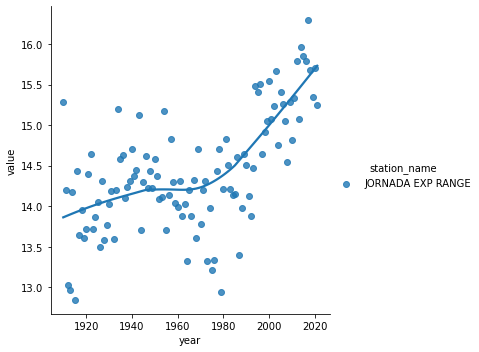

In [17]:
g = sns.lmplot(x='year', y='value', hue='station_name', lowess=True, data=annmean)

In [19]:
gby = prcp.loc[prcp.date > '1960-01-01',:].groupby(['station_name','year'])
annmean_p = gby.sum().reset_index()
annmean_p.value = annmean_p.value
annmean_p.head()

,station_name,year,day,value,latitude
0,JORNADA EXP RANGE,1960,366,176.5,391.4028
1,JORNADA EXP RANGE,1961,365,294.9,391.4028
2,JORNADA EXP RANGE,1962,365,395.1,391.4028
3,JORNADA EXP RANGE,1963,365,126.6,391.4028
4,JORNADA EXP RANGE,1964,366,201.3,391.4028


Text(40.97549479166668, 0.5, 'Annual Precipitation (mm)')

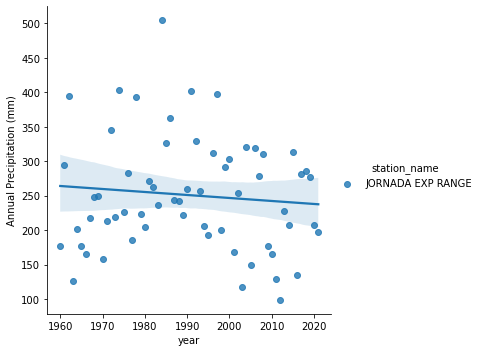

In [20]:
g = sns.lmplot(x='year', y='value', hue='station_name', lowess=False, data=annmean_p)
plt.ylabel('Annual Precipitation (mm)')

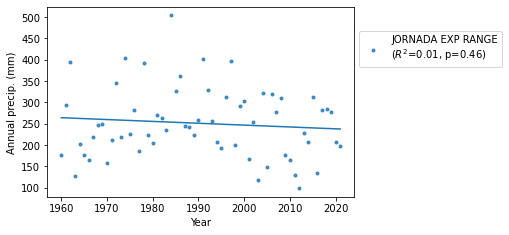

In [21]:
ann_piv = annmean_p.pivot(index='year', columns='station_name', values='value')
ann_piv['date'] = pd.to_datetime(ann_piv.index.astype(str) + '-12-31', format='%Y-%m-%d')
ann_piv.index
from scipy import stats

fig, axes = plt.subplots(1,1, figsize=[5.5,3.5])

#sns.set_palette('magma')
slope, intercept, rv, pv, se = stats.linregress(ann_piv.index,ann_piv['JORNADA EXP RANGE'])
sns.regplot(ax=axes, x=ann_piv.index, y='JORNADA EXP RANGE', ci=False,
            data=ann_piv, label="JORNADA EXP RANGE\n($R^2$={0:.2f}, p={1:.2f})".format(rv**2, pv),
            marker='.', line_kws={'lw':'1.5','zorder':11},
            scatter_kws={'zorder':10})
#slope, intercept, rv, pv, se = stats.linregress(ann_piv.index,ann_piv['KINGMAN #2'])
#sns.regplot(ax=axes, x=ann_piv.index, y='KINGMAN #2', ci=False,
#            data=ann_piv, label="KINGMAN #2\n($R^2$={0:.2f}, p={1:.2f})".format(rv**2, pv),
#            marker='s', line_kws={'lw':'1.5','zorder':11},
#            scatter_kws={'zorder':10,'s':9})
#slope, intercept, rv, pv, se = stats.linregress(ann_piv.index,ann_piv['NEEDLES AP'])
#sns.regplot(ax=axes, x=ann_piv.index, y='NEEDLES AP', ci=False,
#            data=ann_piv, label="NEEDLES AP\n($R^2$={0:.2f}, p={1:.2f})".format(rv**2, pv),
#            marker='^', line_kws={'lw':'1.5','zorder':11},
#            scatter_kws={'zorder':10, 's':18})
#slope, intercept, rv, pv, se = stats.linregress(ann_piv.index,ann_piv['SEARCHLIGHT'])
#sns.regplot(ax=axes, x=ann_piv.index, y='SEARCHLIGHT', ci=False,
#            data=ann_piv, label="SEARCHLIGHT\n($R^2$={0:.2f}, p={1:.2f})".format(rv**2, pv),
#            marker='d', line_kws={'lw':'1.5','zorder':11},
#            scatter_kws={'zorder':10,'s':9})

axes.legend(bbox_to_anchor=(1,.9),loc="upper left")
#axes[0].set_xlim([1960, 2020])
axes.set_ylabel('Annual precip. (mm)')
axes.set_xlabel('Year')

fig.savefig('../fig/Jornada_ltprecip.png',dpi=500,bbox_inches='tight', facecolor='white')

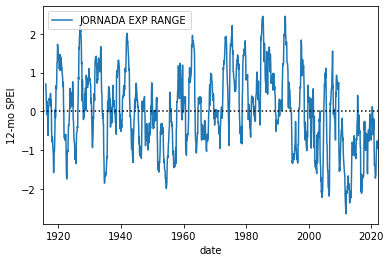

In [22]:
spei = pd.read_csv('../data/Jornada_USHCN_SPEI.csv')
spei.index = pd.to_datetime(spei.date)
g = sns.lineplot(x=spei.index, y='value', estimator=None, hue='station_name', data=spei)
plt.hlines(y=0, xmin=spei.index.min(), xmax=spei.index.max(), color='black', ls=':')
plt.legend(loc='upper left')
plt.xlim([spei.index.min(), spei.index.max()])
plt.ylabel('12-mo SPEI')
plt.savefig('../fig/Jornada_ltSPEI.png',dpi=200,bbox_inches='tight', facecolor='white')

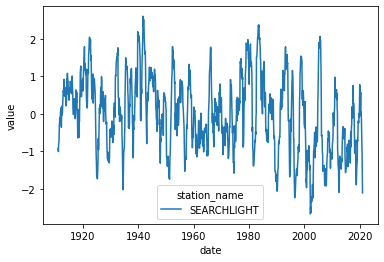

In [51]:
spei_SL = spei.loc[spei.station_name=='SEARCHLIGHT',]
spei_SL.index = pd.to_datetime(spei_SL.date)
g2 = sns.lineplot(x=spei_SL.index, y='value', estimator=None, hue='station_name', data=spei_SL)

In [52]:
ann_piv = annmean.pivot(index='year', columns='station_name', values='value')
ann_piv['date'] = pd.to_datetime(ann_piv.index.astype(str) + '-12-31', format='%Y-%m-%d')
ann_piv.index

Int64Index([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
            ...
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='year', length=111)

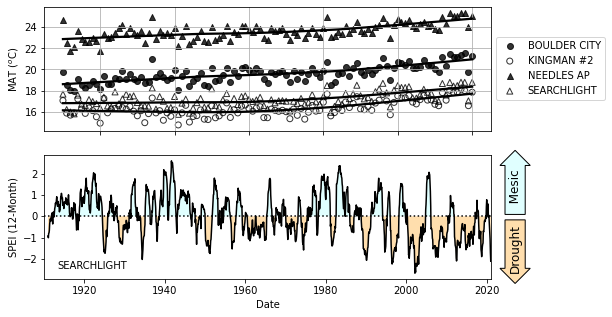

In [53]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, sharex=False, figsize=[8,5])

#sns.set_palette('magma')
sns.regplot(ax=axes[0], x=ann_piv.index, y='BOULDER CITY', lowess=True, 
            data=ann_piv, label='BOULDER CITY', color='k', scatter_kws={'marker':'o'})
sns.regplot(ax=axes[0], x=ann_piv.index, y='KINGMAN #2', lowess=True, 
            data=ann_piv, label='KINGMAN #2', color='k',
            scatter_kws={'marker':'o', 'facecolors':'none'})
sns.regplot(ax=axes[0], x=ann_piv.index, y='NEEDLES AP', lowess=True, 
            data=ann_piv, label='NEEDLES AP', color='k', marker='^')#, scatter_kws={'marker':'^'})
sns.regplot(ax=axes[0], x=ann_piv.index, y='SEARCHLIGHT', lowess=True, 
            data=ann_piv, label='SEARCHLIGHT', color='k', marker='^',
            scatter_kws={'facecolors':'none'})
handles, _ = axes[0].get_legend_handles_labels()

axes[0].legend(bbox_to_anchor=(1,.8), loc="upper left")
axes[0].set_xlim([1905, 2025])
axes[0].set_ylabel('MAT ($^o$C)')
axes[0].set_xlabel('')
axes[0].set_xticklabels('')
axes[0].grid(True)

sns.lineplot(x=spei_SL.index, y='value', data=spei_SL, ax=axes[1], color='black')
axes[1].hlines(y=0, xmin=spei_SL.index.min(), xmax=spei_SL.index.max(), color='black', ls=':')
axes[1].set_xlim([spei_SL.index.min(), spei_SL.index.max()])
axes[1].set_ylabel('SPEI (12-Month)')
axes[1].set_xlabel('Date')
axes[1].fill_between(spei_SL.index, spei_SL.value, 0, where=spei_SL.value<0,
                 facecolor='navajowhite')
axes[1].fill_between(spei_SL.index, spei_SL.value, 0, where=spei_SL.value>0,
                 facecolor='lightcyan')
axes[1].text(0.03, 0.08, 'SEARCHLIGHT', transform=axes[1].transAxes)
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="lightcyan", ec="k", lw=1)
t = axes[1].text(1.04, 0.75, "  Mesic  ", ha="left", va="center", rotation=90,
            size=12, bbox=bbox_props, transform=axes[1].transAxes)
bbox_props = dict(boxstyle="larrow,pad=0.3", fc="navajowhite", ec="k", lw=1)
t2 = axes[1].text(1.04, 0.25, "Drought", ha="left", va="center", rotation=90,
            size=12, bbox=bbox_props, transform=axes[1].transAxes)


In [54]:
fig.savefig('../figures/Mojave_14C_ltclim.png',dpi=200,bbox_inches='tight', facecolor='white')

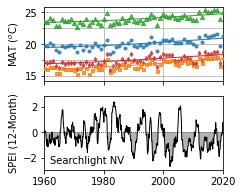

In [57]:
import matplotlib.dates as md
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, axes = plt.subplots(2,1, sharex=False, figsize=[3.2,3])

#sns.set_palette('magma')
sns.regplot(ax=axes[0], x=ann_piv.index, y='BOULDER CITY', lowess=True, 
            data=ann_piv, label='BOULDER CITY', marker='.', line_kws={'lw':'1','zorder':11},
            scatter_kws={'zorder':10})
sns.regplot(ax=axes[0], x=ann_piv.index, y='KINGMAN #2', lowess=True, 
            data=ann_piv, label='KINGMAN #2', marker='s', line_kws={'lw':'1','zorder':11},
            scatter_kws={'zorder':10,'s':9})
sns.regplot(ax=axes[0], x=ann_piv.index, y='NEEDLES AP', lowess=True, 
            data=ann_piv, label='NEEDLES AP', marker='^', line_kws={'lw':'1','zorder':11},
            scatter_kws={'zorder':10, 's':18})
sns.regplot(ax=axes[0], x=ann_piv.index, y='SEARCHLIGHT', lowess=True, 
            data=ann_piv, label='SEARCHLIGHT', marker='d', line_kws={'lw':'1','zorder':11},
            scatter_kws={'zorder':10,'s':9})
handles, _ = axes[0].get_legend_handles_labels()

#axes[0].legend(bbox_to_anchor=(1,.8), loc="upper left")
axes[0].set_xlim([1960, 2020])
axes[0].set_ylabel('MAT ($^o$C)')
axes[0].set_xlabel('')
axes[0].set_xticklabels('')

axes[0].yaxis.set_minor_locator(MultipleLocator(2.5))
#axes[0].yaxis.set_minor_locator(AutoMinorLocator())
axes[0].grid(which='both')

sns.lineplot(x=spei_SL.index, y='value', data=spei_SL, ax=axes[1], color='black', lw=1)
axes[1].hlines(y=0, xmin=spei_SL.index.min(), xmax=spei_SL.index.max(), color='black', ls=':', lw=0.75)
axes[1].set_xlim([pd.to_datetime('1960-01-01'), pd.to_datetime('2020-01-01')])
axes[1].set_ylabel('SPEI (12-Month)')
axes[1].set_xlabel('Date')
axes[1].fill_between(spei_SL.index, spei_SL.value, 0, where=spei_SL.value<0,
                 facecolor='0.7')
step=20
axes[1].xaxis.set_major_locator(md.YearLocator(step, month = 1, day = 1))
axes[1].xaxis.set_major_formatter(md.DateFormatter('%Y'))
axes[1].set_xlabel('')
axes[1].text(0.03, 0.08, 'Searchlight NV', transform=axes[1].transAxes)
#bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="lightcyan", ec="k", lw=1)
#t = axes[1].text(1.04, 0.75, "  Mesic  ", ha="left", va="center", rotation=90,
#            size=12, bbox=bbox_props, transform=axes[1].transAxes)
#bbox_props = dict(boxstyle="larrow,pad=0.3", fc="navajowhite", ec="k", lw=1)
#t2 = axes[1].text(1.04, 0.25, "Drought", ha="left", va="center", rotation=90,
#            size=12, bbox=bbox_props, transform=axes[1].transAxes)
fig.savefig('../figures/Mojave_14C_ltclim2.png',dpi=500,bbox_inches='tight', facecolor='white')

## TEST GHCN data

In [8]:
# The GHCN ID for Searchlight is GHCN (USC00267369)
# See here for possible API calls:  https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation
#'https://www.ncei.noaa.gov/access/services/data/v1?dataset=global-summary-of-the-year&dataTypes=TMAX,TMIN,TAVG,PRCP&stations=USC00267369&startDate=2017-01-01&endDate=2020-01-31&includeAttributes=true&format=csv'
# Its at 1079 m (3540 feet, change from csv to pdf and paste into browser to get a nice report)
rqst = 'https://www.ncei.noaa.gov/access/services/data/v1?dataset=global-summary-of-the-year&dataTypes=TMAX,TMIN,TAVG,PRCP&stations=USC00267369&startDate=2017-01-01&endDate=2020-01-31&includeAttributes=true&format=csv'
sl_annual = pd.read_csv(rqst)
sl_annual

,STATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USC00267369,2017,253.7,",7",18.70,7,24.82,7,12.59,7
1,USC00267369,2018,154.8,",7",18.69,7,24.82,7,12.56,7


In [7]:
import climate_tools.get_ghcn as ghcn

In [12]:
importlib.reload(ghcn)
test = ghcn.get_dailysummary('USC00267369',startdt='2015-01-01',enddt='2020-01-31')

In [9]:
test.head()

,STATION,DATE,PRCP,TAVG,TMAX,TMIN
0,USC00267369,2015-01-01,1.3,NaN,-1.7,-6.1
1,USC00267369,2015-01-02,0.0,NaN,3.3,-5.6
2,USC00267369,2015-01-03,0.0,NaN,6.1,-2.2
3,USC00267369,2015-01-04,0.0,NaN,8.9,-2.2
4,USC00267369,2015-01-05,0.0,NaN,11.1,-0.6


In [43]:
test.index = pd.to_datetime(test.DATE)

In [50]:
gby = test.groupby([test.index.year, test.index.month])
gby.TMAX.mean()

DATE  DATE
2017  1        9.829032
      2       14.578571
      3       21.580645
      4       23.876667
      5       27.132258
      6       36.040000
      7       36.583871
      8       35.412903
      9       30.183333
      10      25.809677
      11      20.666667
      12      15.116129
2018  1       15.625806
      2       16.067857
      3       17.219355
      4       26.113333
      5       28.690323
      6       34.923333
      7       36.990323
      8       36.035484
      9       33.170000
      10      22.566667
      11      17.480000
      12      12.687097
2019  1       11.741379
      2        9.371429
      3       16.648387
      4       24.192308
      5       22.680000
      6       33.648276
      7       36.417241
      8       36.967742
      9       31.640000
      10      23.080645
      11      17.526087
      12      10.648387
2020  1       13.110345
Name: TMAX, dtype: float64

In [10]:
test2 = ghcn.get_monthlysummary('USC00267369',startdt='2015-01-01',enddt='2020-01-31')

In [11]:
test2.head()

,STATION,DATE,PRCP,TAVG,TMAX,TMIN
0,USC00267369,2015-01,17.0,9.1,13.2,4.9
1,USC00267369,2015-02,5.1,13.1,18.9,7.3
2,USC00267369,2015-03,24.4,15.4,21.4,9.5
3,USC00267369,2015-04,4.3,16.1,22.9,9.3
4,USC00267369,2015-05,9.7,18.4,24.9,12.0


In [17]:
test3 = ghcn.get_annualsummary('USC00267369',startdt='2015-01-01',enddt='2020-01-31')

In [19]:
test3.head()

,STATION,DATE,PRCP,TAVG,TMAX,TMIN
0,USC00267369,2015,141.6,NaN,NaN,NaN
1,USC00267369,2016,299.3,18.4,24.5,12.3
2,USC00267369,2017,253.7,18.7,24.8,12.6
3,USC00267369,2018,154.8,18.7,24.8,12.6
